In [1]:
import pandas as pd
import numpy as np
import json
import csv
import matplotlib.pyplot as plt
#1.确定这几个数据都是干什么的
swiping_card_dataframe = pd.read_csv('./bus_swiping_card_info1.csv')
card_info_dataframe = pd.read_csv('./card_info.csv')
bus_swip_dataframe = pd.read_excel('公交数据.xlsx',sheet_name='刷卡数据',header=0,engine='openpyxl')
bus_station_dataframe = pd.read_excel('公交数据.xlsx',sheet_name='站点数据',header=0,engine='openpyxl')
#swiping_card_dataframe ： 每次刷卡的信息：几号线，第几站，车辆的id，刷卡的id，刷卡的时间
#card_info_dataframe ： 每次刷卡的信息：几号线，第几站，车辆的id，刷卡的id，刷卡的时间也是上面的信息，但是时间是去年的。
#用去年的时间的同比数据，去预测今年的同比数据，看是否一致，如果一致，说明经济发展没有变化，如果变大，说明经济好转
#bus_swip_dataframe ：一天的统计信息：各条线路、各个站点的刷卡数量信息
#bus_station_dataframe ： 站点的统计信息：各个站点的经纬度

In [15]:
bus_station_dataframe

,id,line_identity,line_direction,station_number,station_identity,station_name,longitude,latitude
0,1,1047,1,55,1,碧海商业广场,106.618469,26.633052
1,2,1047,1,55,2,碧水云天,106.617741,26.635156
2,3,1047,1,55,3,新瑞商业中心,106.616733,26.637384
3,4,1047,1,55,4,黎阳家园,106.619175,26.638324
4,5,1047,1,55,5,黔中一中（西）,106.620504,26.630221
...,...,...,...,...,...,...,...,...
12141,12142,752,0,14,10,三岔河,106.802352,26.486220
12142,12143,752,0,14,11,花寨,106.800027,26.494632
12143,12144,752,0,14,12,葫芦坡,106.798085,26.497952
12144,12145,752,0,14,13,白腊山,106.760324,26.517857


# 统计站点经过的线路分布

In [6]:
lins_pass_stations = bus_station_dataframe.groupby('station_name').agg({'line_identity':list}).reset_index()
lins_pass_stations['nums'] = lins_pass_stations['line_identity'].apply(lambda x:len(x))
lins_pass_stations

,station_name,line_identity,nums
0,(招呼站),"[226, 226, 226, 226, 228, 228]",6
1,113厂小区,"[227, 227, 226, 226, 228, 228]",6
2,117地质队,"[247, 247, 10056, 10056, 251, 251, 1017, 1017,...",19
3,1958文化园,"[244, 244, 809, 245]",4
4,501厂宿舍区,"[605, 605]",2
...,...,...,...
1444,龙腾路口,"[804, 804, 262, 262, 805, 805]",6
1445,龙里中学,"[803, 803]",2
1446,龙里北站,"[803, 803]",2
1447,龙里经开区,"[803, 803]",2


In [10]:
lines_per_station = list(zip(lins_pass_stations['nums'].values.tolist(),lins_pass_stations['station_name'].values.tolist()))
sorted_lines_per_station = sorted(lines_per_station,key=lambda x:x[0],reverse=True)
sorted_lines_per_station 

[(84, '喷水池'),
 (80, '火车站'),
 (76, '黔中北站'),
 (68, '次南门'),
 (66, '大西门'),
 (66, '紫林庵'),
 (64, '北京路'),
 (62, '师大'),
 (62, '黔灵山公园'),
 (59, '头桥'),
 (58, '二桥'),
 (58, '河滨公园'),
 (57, '大营坡'),
 (56, '大十字'),
 (56, '新路口'),
 (53, '三桥'),
 (53, '油榨街'),
 (51, '湘雅村'),
 (51, '纪念塔'),
 (50, '花香村'),
 (49, '国际会议中心'),
 (49, '金阳客站'),
 (46, '贵开路'),
 (45, '转弯塘'),
 (44, '花果园购物中心'),
 (43, '贵州医科大学'),
 (42, '北京西路口'),
 (42, '和尚坡'),
 (42, '西坝大道北段'),
 (42, '邮电大楼'),
 (41, '三桥北路口'),
 (41, '国际会议中心东'),
 (41, '展览馆'),
 (40, '宾阳大道'),
 (40, '新发装饰市场'),
 (40, '陈家坡'),
 (39, '小湾河大桥'),
 (39, '浣沙桥'),
 (39, '甲秀南路北'),
 (39, '花果园湿地公园'),
 (39, '蟠桃宫'),
 (39, '金阳医院'),
 (38, '体育馆'),
 (38, '火车站批发市场'),
 (38, '花果园'),
 (37, '中天花园路口'),
 (37, '威清路口'),
 (37, '沙冲中路'),
 (37, '金阳远大'),
 (36, '延安西路'),
 (35, '凤凰翠堤'),
 (35, '居然之家'),
 (35, '龙泉新村'),
 (35, '龙泉苑街口'),
 (34, '大理石路口'),
 (34, '相宝山'),
 (34, '箭道街路口'),
 (33, '四方河'),
 (33, '小河平桥'),
 (33, '新添寨'),
 (33, '皂角井站'),
 (33, '长岭南路口'),
 (32, '大山洞'),
 (32, '长岭南路中'),
 (31, '北京西路西'),
 (31, '甘荫塘'),
 (31, '省公安厅'

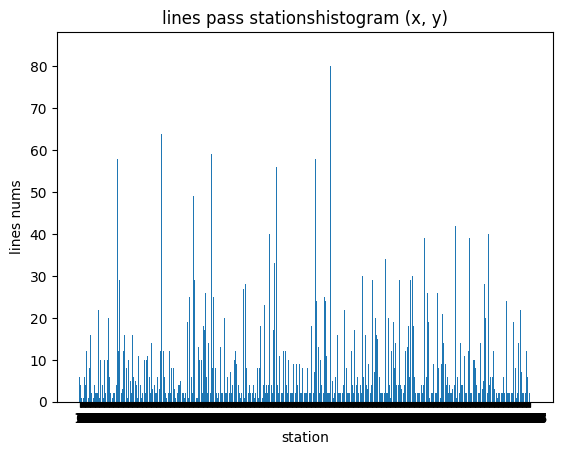

('x:',
 array([   0,    1,    2, ..., 1446, 1447, 1448]),
 'y:',
 array([ 6,  6, 19, ...,  2,  2, 15]))

In [8]:
y=lins_pass_stations['nums'].values.tolist()
import matplotlib.pyplot as plt
# 创建直方图
plt.bar(range(len(y)), y)
# 设置横轴刻度标签为自定义的类别名称
plt.xticks(range(len(y)), list(range(len(y))))
# 添加标题和标签
plt.title('lines pass stationshistogram (x, y)')
plt.xlabel('station')
plt.ylabel('lines nums')
# 保存图形为SVG格式
plt.savefig('./figures/lines_nums_pass_station_histogram.svg', format='svg')
# 显示图形
plt.show()
'x:',np.array(list(range(len(y)))),'y:',np.array(y)

In [13]:
lines_pass_stations_nums = lins_pass_stations.groupby('nums').agg({'station_name':list}).reset_index()
lines_pass_stations_nums['length'] =lines_pass_stations_nums['station_name'].apply(lambda x :len(x)) 
lines_pass_stations_nums

,nums,station_name,length
0,1,"[aa, 七星湖路口, 七星湖路西, 七星湖路（西）, 三桥农贸中心, 上朝阳洞路口, 东新...",110
1,2,"[501厂宿舍区, 5708厂家属区, 三十中, 三岔河, 三江, 上午村, 上坝, 上坝巷...",449
2,3,"[万江厂, 东新区路, 中天未来方舟站, 云岭东路, 云岭中路, 云环东路, 亚太中心, 兴...",45
3,4,"[1958文化园, 万科城首末站, 万豪大道, 三五三七厂, 三眼井, 上寨村, 上枧村, ...",188
4,5,"[三桥农资中心, 交警五大队, 会展南路口, 南垭路站, 合朋路口, 太阳湖, 富水南路, ...",28
...,...,...,...
56,66,"[大西门, 紫林庵]",2
57,68,[次南门],1
58,76,[黔中北站],1
59,80,[火车站],1


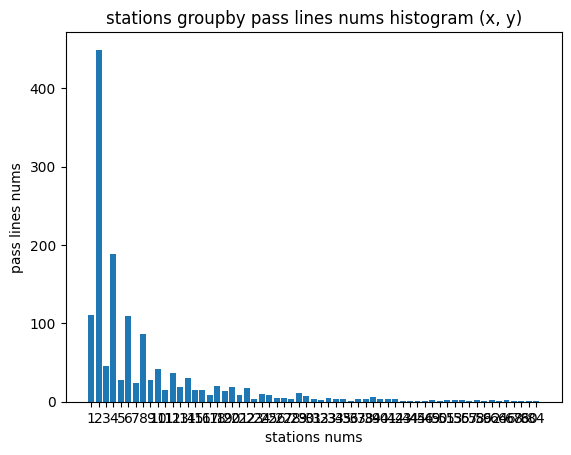

('x:',
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49, 50, 51, 53, 56,
        57, 58, 59, 62, 64, 66, 68, 76, 80, 84]),
 'y:',
 array([110, 449,  45, 188,  28, 109,  24,  86,  28,  42,  15,  37,  19,
         30,  15,  15,   8,  20,  14,  19,   8,  18,   4,  10,   8,   5,
          5,   4,  11,   7,   4,   2,   5,   3,   4,   1,   4,   3,   6,
          3,   3,   4,   1,   1,   1,   1,   2,   1,   2,   2,   2,   1,
          2,   1,   2,   1,   2,   1,   1,   1,   1]))

In [14]:
x=lines_pass_stations_nums['nums'].values.tolist()
y=lines_pass_stations_nums['length'].values.tolist()
# 创建直方图
plt.bar(range(len(y)), y)
# 设置横轴刻度标签为自定义的类别名称
plt.xticks(range(len(y)), x)
# 添加标题和标签
plt.title('stations groupby pass lines nums histogram (x, y)')
plt.xlabel('stations nums')
plt.ylabel('pass lines nums')
# 保存图形为SVG格式
plt.savefig('./figures/stations_nums_pass_lines_nums_histogram.svg', format='svg')
# 显示图形
plt.show()
'x:',np.array(x),'y:',np.array(y)

# 统计线路经过的站点数

In [16]:
line_station_number_sequen_dataframe = \
bus_station_dataframe.groupby(['line_identity','station_number']).agg({'station_name':list,'station_identity':list}).reset_index()
line_station_number_sequen_dataframe['length'] = line_station_number_sequen_dataframe['station_identity'].apply(lambda x:len(x))
line_station_number_sequen_dataframe

,line_identity,station_number,station_name,station_identity,length
0,1,20,"[火车站, 展览馆, 新路口, 邮电大楼, 大十字, 喷水池, 云中广场, 六广门, 北京路...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",20
1,2,20,"[火车站, 展览馆, 新路口, 河滨公园, 次南门, 大西门, 紫林庵, 延安西路, 黔灵山...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",20
2,3,29,"[贵州理工学院, 贵黄交警支队, 枫丹白鹭花园, 后坝, 三桥水果市场, 三桥, 三桥北路口...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",29
3,4,44,"[新寨公交枢纽, 南厂路南, 军区干休所, 武岳新村, 军区二招, 南厂路北, 纪念塔, 箭...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",44
4,5,36,"[甘荫塘轨道站, 甘荫塘, 四方河路站, 通银配件城, 皂角井站, 凤凰翠堤, 新发装饰市场...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",36
...,...,...,...,...,...
320,10050,46,"[一八三厂, 毛寨村, 小河平桥, 黄河路南, 黄河路北, 四十四医院, 新村, 四方河, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",46
321,10056,31,"[乐湾国际城, 东风镇, 贵州师范学院, 云上村, 117地质队, 温泉路口, 新添寨, 市...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",31
322,10229,28,"[金阳客站, 商城东路, 宾阳大道, 兴筑西路, 碧海乾图, 黔中一中南, 老阳关, 北京路...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",28
323,10262,24,"[黔中北站, 甲秀北路, 杨家庄, 大关, 鹿冲关公园, 相宝山, 师大, 省公安厅, 宝山...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",24


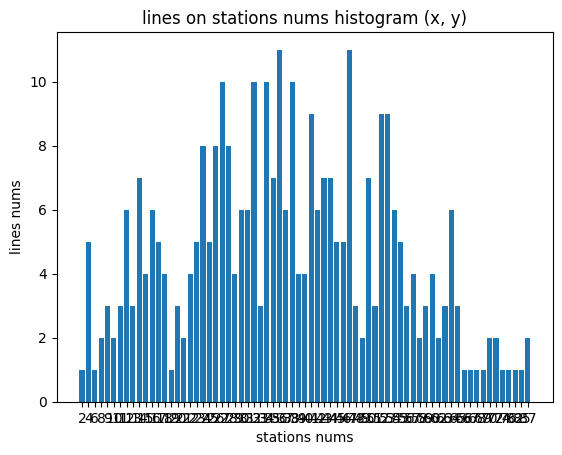

('x:',
 array([ 2,  4,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 76,
        82, 85, 87]),
 'y:',
 array([ 1,  5,  1,  2,  3,  2,  3,  6,  3,  7,  4,  6,  5,  4,  1,  3,  2,
         4,  5,  8,  5,  8, 10,  8,  4,  6,  6, 10,  3, 10,  7, 11,  6, 10,
         4,  4,  9,  6,  7,  7,  5,  5, 11,  3,  2,  7,  3,  9,  9,  6,  5,
         3,  4,  2,  3,  4,  2,  3,  6,  3,  1,  1,  1,  1,  2,  2,  1,  1,
         1,  1,  2]))

In [17]:
#统计不同车站数量对应的线路数量
stations_nums_line_statistics = line_station_number_sequen_dataframe.groupby('length').agg({'line_identity':list}).reset_index()
stations_nums_line_statistics['nums']=stations_nums_line_statistics['line_identity'].apply(lambda x:len(x))
stations_nums_line_statistics
x=stations_nums_line_statistics['length'].values.tolist()
y=stations_nums_line_statistics['nums'].values.tolist()
import matplotlib.pyplot as plt
# 创建直方图
plt.bar(range(len(x)), y)
# 设置横轴刻度标签为自定义的类别名称
plt.xticks(range(len(x)), x)
# 添加标题和标签
plt.title('lines on stations nums histogram (x, y)')
plt.xlabel('stations nums')
plt.ylabel('lines nums')
# 保存图形为SVG格式
#plt.savefig('./figures/stations_nums_lines_histogram.svg', format='svg')
# 显示图形
plt.show()
'x:',np.array(x),'y:',np.array(y)

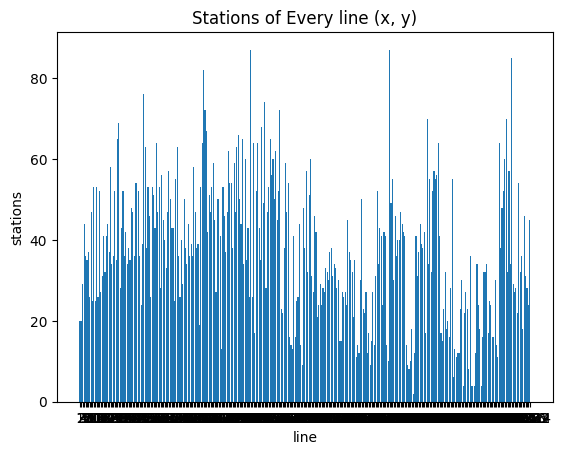

('x:',
 array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
           10,    11,    12,    13,    14,    15,    16,    17,    18,
           19,    20,    21,    22,    23,    24,    25,    26,    27,
           28,    29,    30,    31,    32,    33,    34,    35,    36,
           37,    38,    39,    40,    41,    42,    43,    44,    45,
           46,    47,    48,    49,    50,    51,    52,    53,    54,
           55,    56,    57,    58,    59,    60,    61,    62,    63,
           64,    65,    66,    67,    68,    69,    70,    71,    72,
           73,    74,    75,    76,    77,    78,    79,    80,    81,
           82,    83,    84,    85,    86,    87,   201,   202,   203,
          204,   205,   206,   207,   208,   209,   210,   211,   212,
          213,   214,   215,   216,   217,   218,   219,   220,   221,
          222,   223,   224,   225,   226,   227,   228,   229,   230,
          231,   232,   233,   234,   235,   236,   237,   238,   239,

In [18]:
#画车站数量直方图
x=line_station_number_sequen_dataframe['line_identity'].values.tolist()
y=line_station_number_sequen_dataframe['length'].values.tolist()
import matplotlib.pyplot as plt
# 创建直方图
plt.bar(range(len(x)), y)
# 设置横轴刻度标签为自定义的类别名称
plt.xticks(range(len(x)), x)
# 添加标题和标签
plt.title('Stations of Every line (x, y)')
plt.xlabel('line')
plt.ylabel('stations')
# 保存图形为SVG格式
#plt.savefig('./figures/stations_every_line_histogram.svg', format='svg')
# 显示图形
plt.show()
'x:',np.array(x),'y:',np.array(y)

# 构造字典来方便按照线路和站点序号来索引站点

In [ ]:
line_station_number_sequen_dataframe['id_station'] = \
line_station_number_sequen_dataframe.apply(lambda x:list(zip(x['station_identity'],x['station_name'])),axis=1)
line_station_number_sequen_dataframe
#构建一个字典：
#road_structure = {line_id:{'stations_nums':int,'stations':{station_id:station_name},'all_stations':[]}}
road_line_station_structure_setting={}
for row_index in range(len(line_station_number_sequen_dataframe)):
    line_id = int(line_station_number_sequen_dataframe[row_index:row_index+1]['line_identity'].values[0])
    stations_nums = int(line_station_number_sequen_dataframe[row_index:row_index+1]['station_number'].values[0])
    all_stations = line_station_number_sequen_dataframe[row_index:row_index+1]['station_name'].values[0]
    stations={}
    for instance in line_station_number_sequen_dataframe[row_index:row_index+1]['id_station'].values[0]:
        instance_id = int(instance[0])
        instance_name = instance[1]
        stations[instance_id]=instance_name
    road_line = {'stations_nums':stations_nums,'stations':stations,'all_stations':all_stations}
    road_line_station_structure_setting[line_id] = road_line    
road_line_station_structure_setting
with open('./datas/road_line_station_structure_setting.json','w') as f:
    json.dump(road_line_station_structure_setting,f)